In [ ]:
%matplotlib inline


# 使用手写字体
加载手写字体识别模型来对手写字体进行识别
## 1. 首先引入需要的包

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.externals import joblib

## 2. 使用matplotlib观察数据的
### 2.1 提示
我们使用matplotlib.pyplot.imshow()方法来展示图片。
常用两个参数imshow(X, cmap)
参数X：
他可以接受以下形式的数组：
- (M, N): 灰度图
- (M, N, 3): RGB
- (M, N, 4): RGBA <br>

参数 cmap
cmap为colormap
参照： https://matplotlib.org/examples/color/colormaps_reference.html <br>
例子：
gray：0-255 级灰度，0：黑色，1：白色，黑底白字；
gray_r：翻转 gray 的显示，如果 gray 将图像显示为黑底白字，gray_r会将其显示为白底黑字；
使用例子
```
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('img_1.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)  # (318, 425)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.show()
```
### 2.2 展示前4张手写数字图片

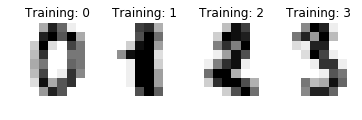

In [2]:
# sklearn 内置了几种常用的数据集，不需要额外下载·
# https://scikit-learn.org/stable/datasets/index.html
# 引入手写数字 digits dataset
digits = datasets.load_digits()
# 每张图片是8*8的数组。首先我们看一些数据的样式
# 他们存储在iamges变量中，target变量是图片的对应的类
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index + 1)
    # 不显示坐标轴
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)

## 3. 对数据处理
因为我们需要对每张图片进行分类，所以需要把(8*8)的矩阵转换成一行。

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


## 4. 加载模型、评估模型、展示预测结果

In [4]:
classifier = joblib.load("./svm_digits_cls")#参数为路径，返回模型
# Now predict the value of the digit on the second half:
expected = digits.target
predicted = classifier.predict(data)

In [5]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.99      0.98      0.99       182
           2       0.99      0.99      0.99       177
           3       0.99      0.93      0.96       183
           4       0.99      0.98      0.99       181
           5       0.97      0.98      0.98       182
           6       0.99      0.99      0.99       181
           7       0.98      0.99      0.99       179
           8       0.97      1.00      0.98       174
           9       0.96      0.99      0.97       180

   micro avg       0.98      0.98      0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98 

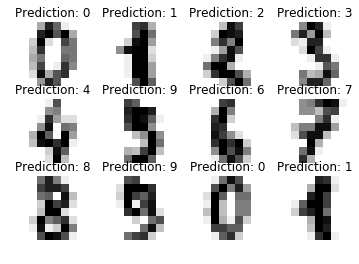

In [6]:
images_and_predictions = list(zip(digits.images, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:12]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % prediction)
plt.show()